<a href="https://colab.research.google.com/github/Luca-Davis/Luca-Bio108-Tutorial/blob/main/Copy_of_Coding_Tutorial_Final__draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Climatic Changes in Wyoming and Montana's Shrinking Glaciers
![image](https://static.scientificamerican.com/sciam/cache/file/C96BB410-4BAE-4EF3-92F11292A9FD881E_source.jpg?w=900)

In [ ]:
###Install Neccesary Packages
!pip install earthpy
! pip install rasterstats
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.3 MB/s eta 0:00:00


##Inspiration 💡
I was inspired by Gonzalez et al (2018) on the disproportionate impacts of warming in the U.S. Gonzales found that mean annual temperature increased 1.0 °C ± 0.2 between 1895 and 2010 within national parks, double the rate of the U.S as a whole. These findings show that national parks are more exposed to the warming effects of climate change.

A 2017 article from the Scientific American titled, "The Rocky Mountains' Largest Glaciers Are Melting with Little Fanfare" called attention to the fact that this region is home to some of the ,"...least understood ice sheets in North America. Researchers don't have a firm grasp on the amount of water locked away in the alpine ice..."

Glaciers are natural reservoirs providing fresh water for drinking and irrigation.
 Glaicers have an indirect impact of wildife. Glacier melt can drive phytoplankton blooms which is the base of aquatic and marine food chains.

##Objectives and questions I aim to take on

I will look at two climate trends.
1) **Absolute change in annual precipitation**
2) **Absolute change in April 1 snow water equivalent**

Precipitation and snowpack both contribute to the growth of glaciers. In this tutorial, we aim to compare how precipitation and snow water equivalent are changing at two different scales: the glaciers themselves and the state area as a whole.



* Absolute change in annual precipitation:
https://www.fs.usda.gov/rm/boise/AWAE/projects/NFS-regional-climate-change-maps/categories/us-raster-layers.html

* Lower 48 Glaciers:
https://nsidc.org/data/glacier_inventory/

*   Absolute change in April 1 snow water equivalent
https://www.fs.usda.gov/rm/boise/AWAE/projects/NFS-regional-climate-change-maps/categories/us-raster-layers.html


##Getting our data 💻

Link to the data folder: https://drive.google.com/drive/u/0/folders/1QHzuW-V5vQg3wGbH97m6cU1QCaNPRRzl


![image](https://www.kanbanchi.com/wp-content/uploads/2024/04/add-shortcut-drive.png)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


String Addition

In [ ]:
all_data = "/content/drive/MyDrive/data"

#Vector Layers

```# using geopandas to read glacier file and get coordinate system as well as show the first 5 rows of the data frame.
#Assigning the file path to a variable
Glacier_URL = all_data + "/GLACIER48/USA_Glaciers_CopyFeatures_ExportFeatures.shp"
#reading it with GeoPandas
Glacier = gpd.read_file(Glacier_URL)
#Getting our DataFrame
print(Glacier.shape)
print(Glacier.crs)
Glacier.head()
```

In [ ]:
#Paste code in here.

(1523, 12)
EPSG:3857


,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,geometry
0,91690.225,1858.679,1488.0,-121.66363,45.34709,snow or ice body,USGS DRG,100K,None,2647.636765,186045.161045,"POLYGON ((-13543448.219 5676035.509, -13543509..."
1,34939.127,1251.714,1489.0,-121.67248,45.34688,snow or ice body,USGS DRG,100K,None,1778.595524,70894.305048,"POLYGON ((-13544270.929 5675977.907, -13544314..."
2,161450.661,2876.548,502.0,-120.93059,47.70061,snow or ice body,USGS DRG,100K,None,4275.313319,357253.154672,"POLYGON ((-13461380.088 6056475.46, -13461515...."
3,8573.238,451.969,1490.0,-121.71219,45.34819,snow or ice body,USGS DRG,100K,None,640.940289,17396.396640,"POLYGON ((-13548893.947 5676643.656, -13548911..."
4,186062.010,1845.828,503.0,-121.16056,47.55879,snow or ice body,USGS DRG,100K,None,2741.104958,409489.447162,"POLYGON ((-13487578.621 6033413.539, -13487777..."


In [ ]:
# assign the usa file path to a variable
usa_path = all_data +  "/USA/s_05mr24.shp"

#Reading it with GeoPandas
usa = gpd.read_file(usa_path)
# Getting our DataFrame
print(usa.shape)
print(usa.crs)
usa.head()

(59, 6)
EPSG:4269


,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.4909 37.00361, -110.4875 37.002..."
4,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.4262 32.79973, -118.42634..."


```
#filter the USA datarame
usa_2 = usa[usa['NAME'].isin(['Wyoming', 'Montana'])]

usa_2.head()
```

In [ ]:
#Paste the code

,STATE,NAME,FIPS,LON,LAT,geometry
24,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-114.3213 49.00081, -114.2604 49.000..."
49,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.10339 45.00591, -109.0892 45.00..."


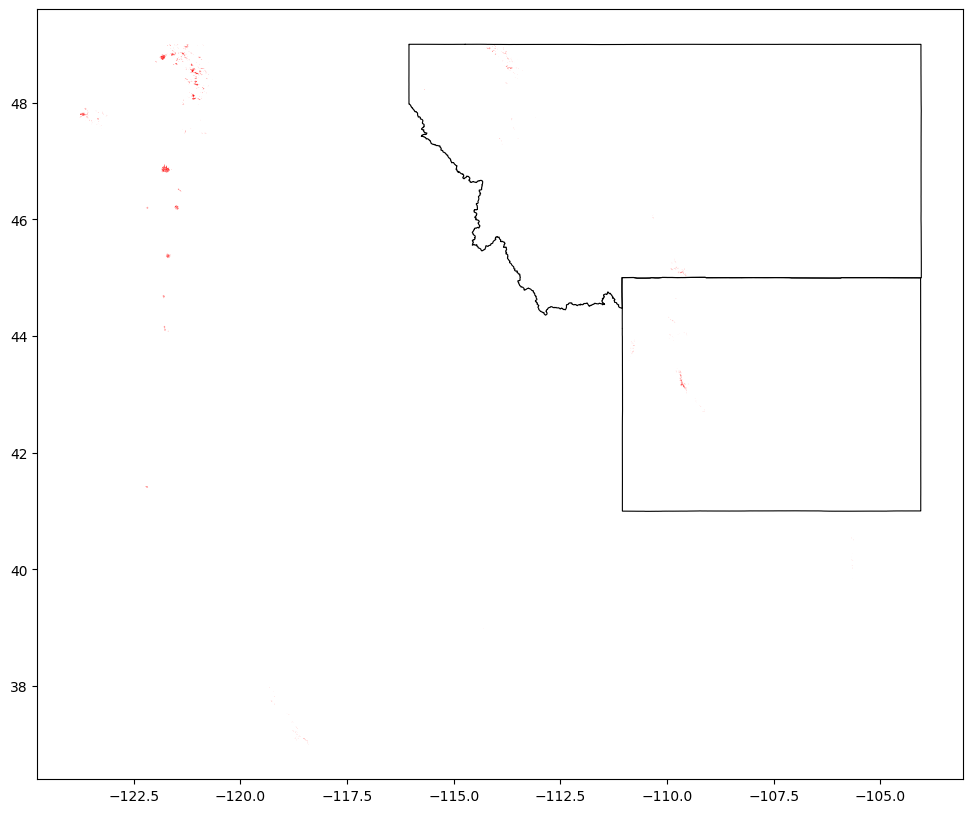

In [ ]:
Glacier_2 = Glacier.to_crs(epsg=4269)
fig, ax = plt.subplots(figsize = (20,10))
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
Glacier_2.plot(ax=ax, facecolor = 'red')
plt.show()

###Clipping our Glaciers with Intersect ✂

---



# Use intersection to clip glacier geometries to the states
```
Glacier_clipped = gpd.overlay(Glacier_2, usa_2, how='intersection')
fig, ax = plt.subplots(figsize=(20, 10))
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
Glacier_clipped.plot(ax=ax, facecolor='red')
plt.show()
```

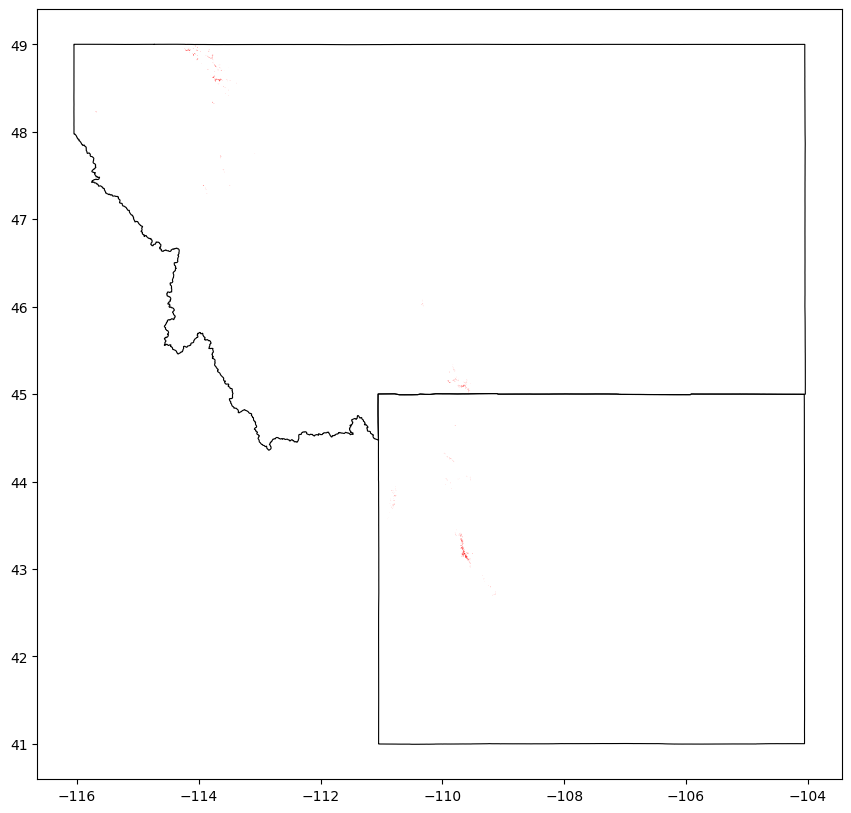

In [ ]:
#Paste Code in here

In [ ]:
print(Glacier_clipped.shape)
Glacier_clipped.head()



(472, 17)


,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,STATE,NAME,FIPS,LON,LAT,geometry
0,67622.587,1053.881,1003.0,-109.55535,43.08424,snow or ice body,USGS DRG,100K,None,1444.159424,127058.256833,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.55614 43.08339, -109.55667 43.0..."
1,176169.290,2094.860,1004.0,-109.56125,43.08842,snow or ice body,USGS DRG,100K,None,2872.514285,331055.777090,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56194 43.08605, -109.56269 43.0..."
2,175583.984,2650.228,1005.0,-109.56718,43.10265,snow or ice body,USGS DRG,100K,None,3633.262144,330108.382208,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56979 43.10027, -109.57122 43.1..."
3,194819.390,1811.623,1006.0,-109.56479,43.09724,snow or ice body,USGS DRG,100K,None,2484.324484,366207.499648,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56652 43.09533, -109.56702 43.0..."
4,257308.589,2749.144,1007.0,-109.58681,43.10225,snow or ice body,USGS DRG,100K,Harrower Glacier,3769.926886,483747.438994,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.58779 43.09962, -109.58808 43.0..."


#Raster Layer
Change in Annual Precipitation

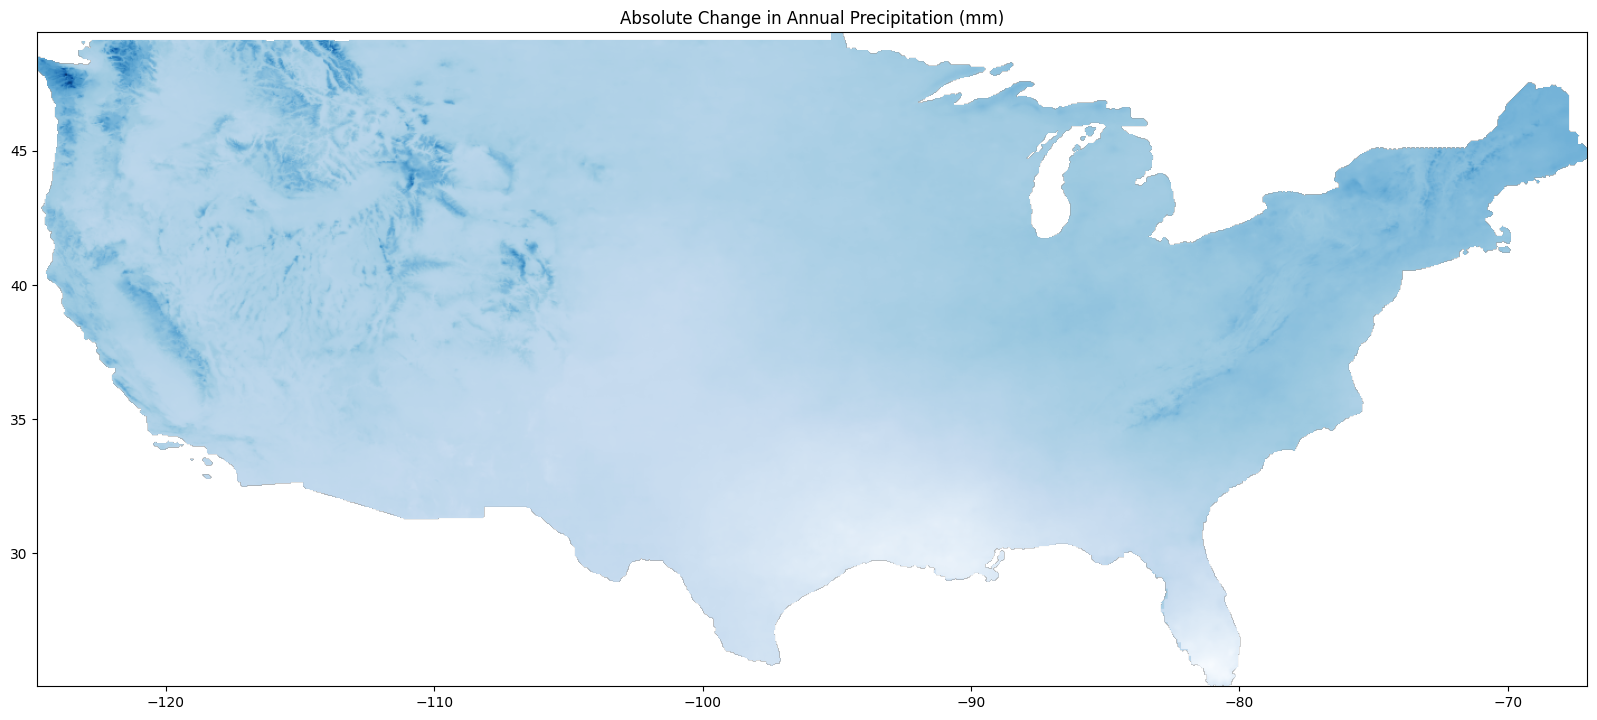

In [ ]:
raster_path = all_data + "/PRECIP/Ppt_annual_AbsChange.tif"
tiff = rasterio.open(raster_path)
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax,cmap="Blues")
ax.set_title("Absolute Change in Annual Precipitation (mm)")

plt.show()

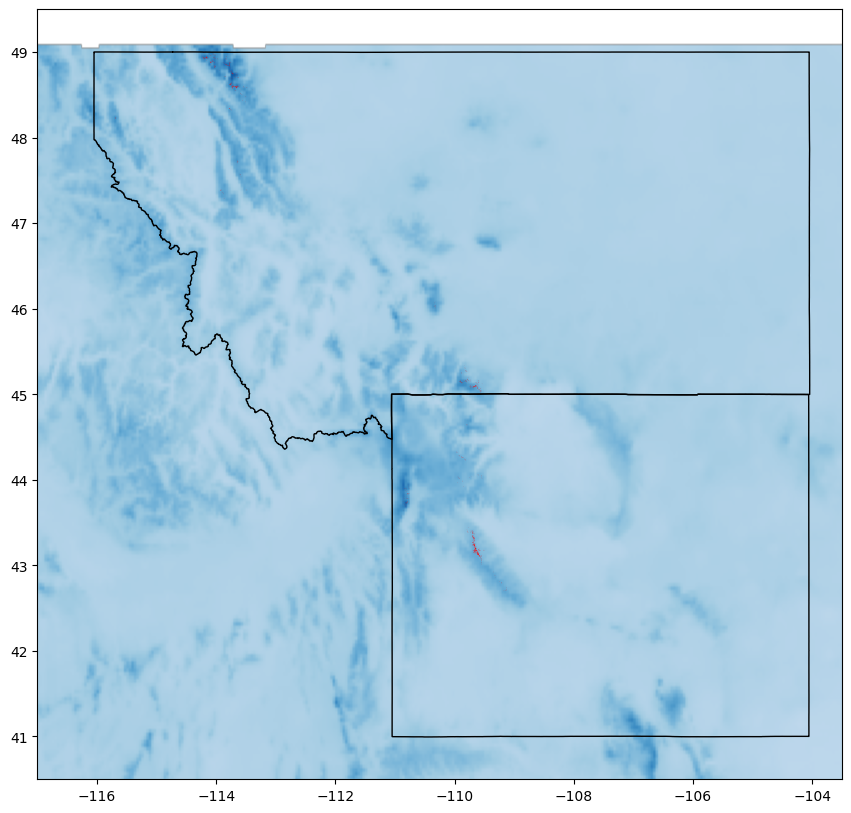

In [ ]:
Glacier_3 = Glacier_clipped.to_crs(epsg=4326)
usa_3 = usa_2.to_crs(epsg =4326)

fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax,cmap='Blues')
usa_3.plot(ax=ax, facecolor ='none', edgecolor='black', linewidth = 1)
Glacier_3.plot(ax=ax, facecolor = 'red')
# Set bounding box for western U.S.
ax.set_xlim([-117, -103.5])
ax.set_ylim([40.5, 49.5])
plt.show()



In [ ]:
#Installing rasterstats
!pip install rasterstats
from rasterstats import zonal_stats

In [ ]:
Glacier_proj = Glacier_3.to_crs(epsg=32612) #projected crs to work with meters
Glacier_buffered = Glacier_proj.copy()

Glacier_buffered['geometry'] = Glacier_buffered.buffer(4000)  # buffer outward ~4000 meters so they all contain at least one 4km pixel
#trying extraction again

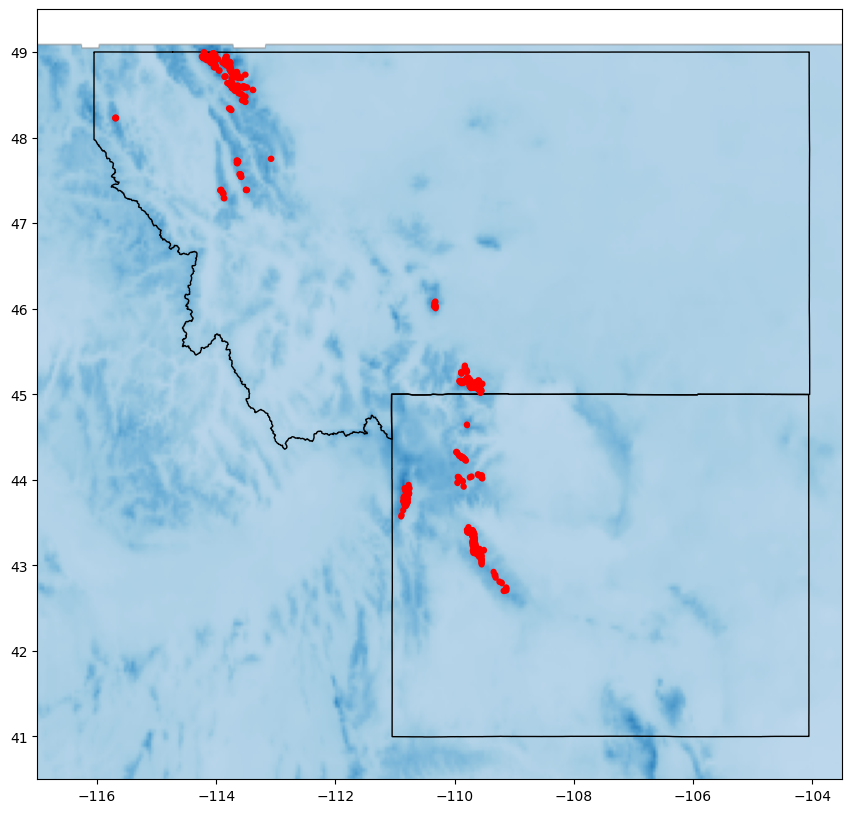

In [ ]:
Glacier_4 = Glacier_buffered.to_crs(epsg=4326)
usa_3 = usa_2.to_crs(epsg =4326)

fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax,cmap="Blues")
usa_3.plot(ax=ax, facecolor ='none', edgecolor='black', linewidth = 1)
Glacier_4.plot(ax=ax, facecolor = 'red')
# Set bounding box for western U.S.
ax.set_xlim([-117, -103.5])
ax.set_ylim([40.5, 49.5])
plt.show()


In [ ]:
result1 = zonal_stats(
    Glacier_4, tiff.read(1),
    nodata =tiff.nodata,
    affine = tiff.transform,
    stats = ['mean'])
result1

[{'mean': 137.3861271046692},
 {'mean': 147.92122251132972},
 {'mean': 143.27893405866294},
 {'mean': 147.92122251132972},
 {'mean': 154.6947235643364},
 {'mean': 130.84872805702946},
 {'mean': 130.84872805702946},
 {'mean': 122.38300918017671},
 {'mean': 144.28883693581844},
 {'mean': 151.25285406334078},
 {'mean': 151.25285406334078},
 {'mean': 133.348910726837},
 {'mean': 134.18641054968103},
 {'mean': 132.500937985252},
 {'mean': 128.48389559537125},
 {'mean': 128.48389559537125},
 {'mean': 124.87513019817152},
 {'mean': 112.05047192038722},
 {'mean': 125.3888235766204},
 {'mean': 134.18641054968103},
 {'mean': 143.20705619152},
 {'mean': 140.14439311855304},
 {'mean': 140.14439311855304},
 {'mean': 139.9757562270542},
 {'mean': 136.643461630755},
 {'mean': 138.538377381464},
 {'mean': 138.538377381464},
 {'mean': 138.538377381464},
 {'mean': 138.538377381464},
 {'mean': 141.76216664732493},
 {'mean': 141.76216664732493},
 {'mean': 136.57592894466248},
 {'mean': 134.88422637777603}

In [ ]:
Glaciers_precip_change =pd.DataFrame(result1)
Glaciers_precip_change.describe()

,mean
count,472.000000
mean,192.900786
std,58.072957
min,106.952564
25%,141.762167
50%,174.665302
75%,244.725227
max,335.246250


In [ ]:
result2 = zonal_stats(
   usa_3, tiff.read(1),
    nodata =tiff.nodata,
    affine = tiff.transform,
    stats = ['mean'])
result2

[{'mean': 52.98385311104591}, {'mean': 53.64129409413954}]

In [ ]:
States_precip_change =pd.DataFrame(result2)
States_precip_change.describe()

,mean
count,2.000000
mean,53.312574
std,0.464881
min,52.983853
25%,53.148213
50%,53.312574
75%,53.476934
max,53.641294


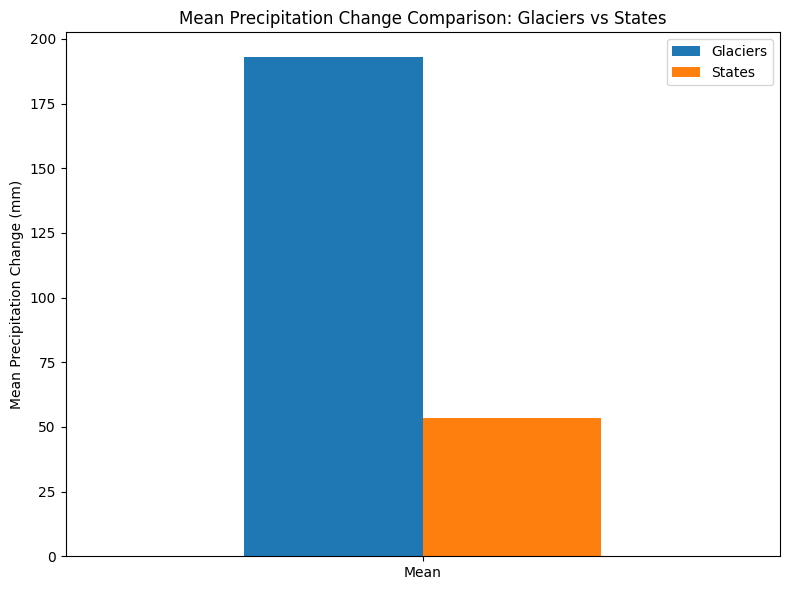

In [ ]:
# Compute means
mean1 = Glaciers_precip_change.mean().values[0]
mean2 = States_precip_change.mean().values[0]

# Create a DataFrame with an index
mean_precip_df = pd.DataFrame({'Glaciers': [mean1], 'States': [mean2]}, index=['Mean'])

# Plot
ax = mean_precip_df.plot(kind='bar', figsize=(8, 6))
ax.set_ylabel('Mean Precipitation Change (mm)')
ax.set_title('Mean Precipitation Change Comparison: Glaciers vs States')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
raster_path = all_data + "/Absolute change in April 1 snow water equivalent/A1SWE_AbsChange.tif"
tiff2 = rasterio.open(raster_path)


EPSG:4326


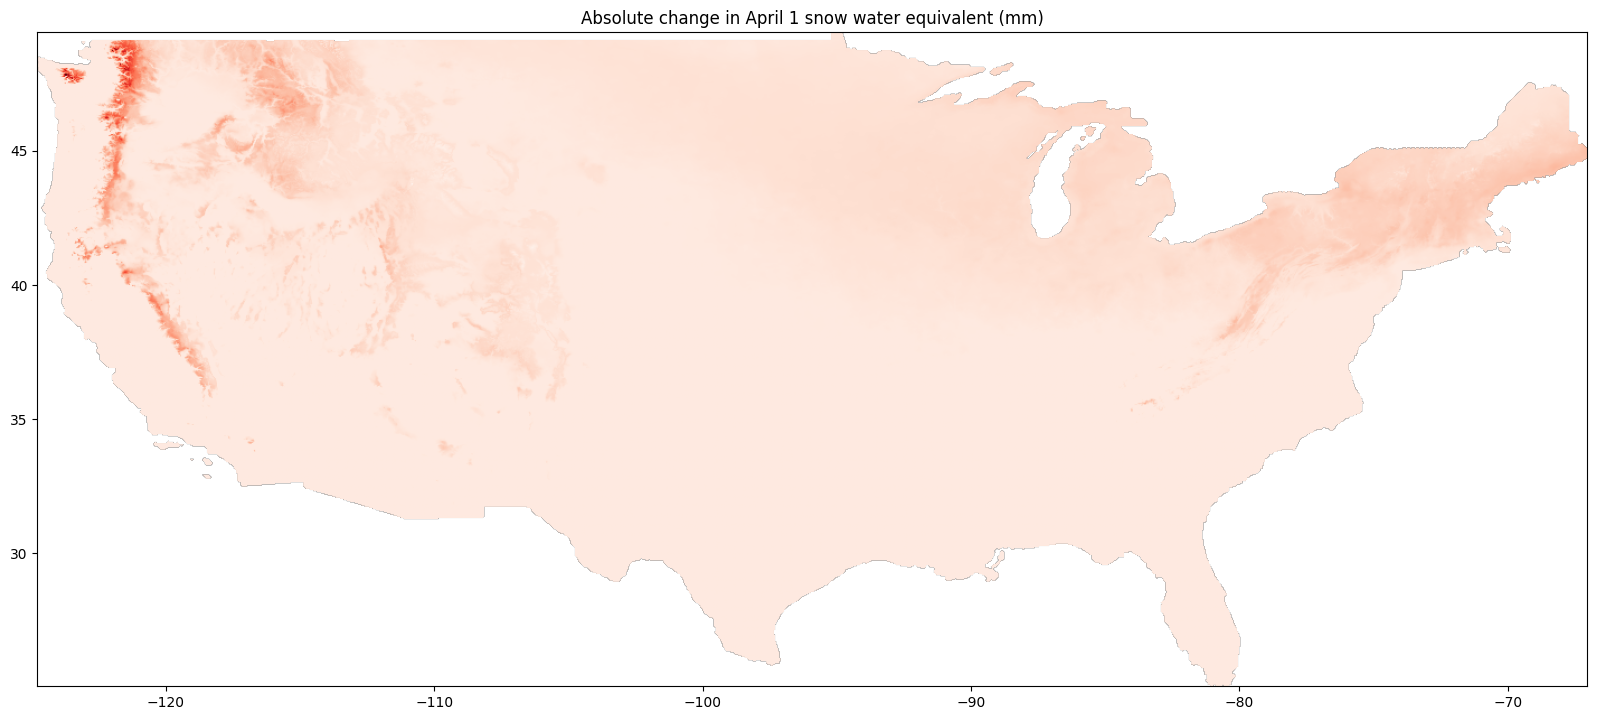

In [ ]:
print(tiff2.crs)
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff2, ax=ax,cmap = 'Reds_r')
ax.set_title("Absolute change in April 1 snow water equivalent (mm)")
plt.show()

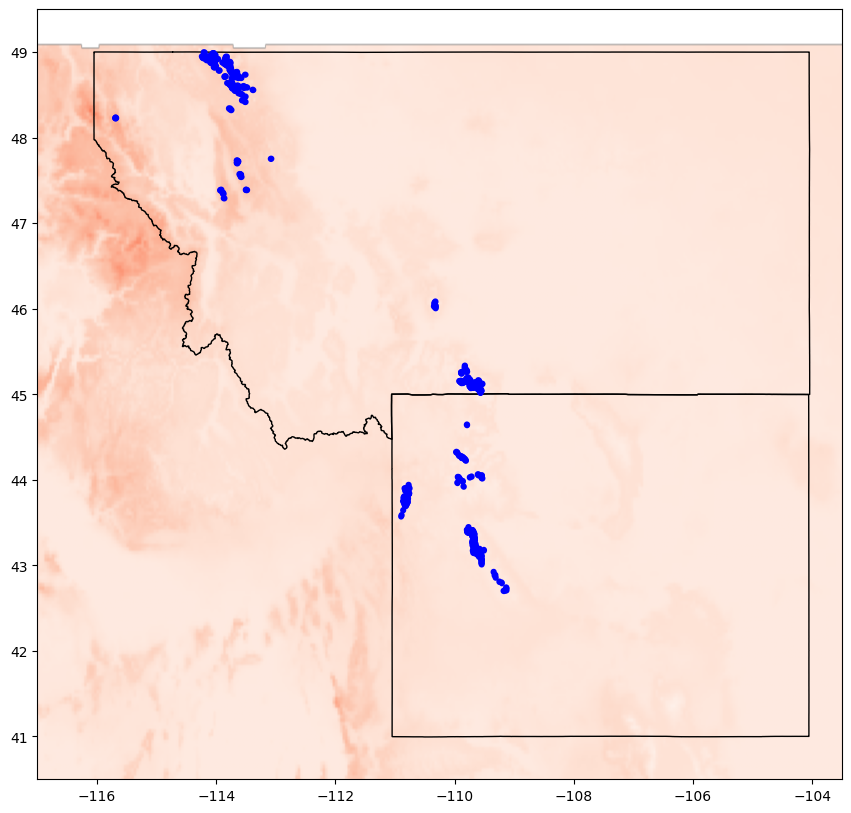

In [ ]:
Glacier_4 = Glacier_buffered.to_crs(epsg=4326)
usa_3 = usa_2.to_crs(epsg =4326)

fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff2, ax=ax, cmap = 'Reds_r' )
usa_3.plot(ax=ax, facecolor ='none', edgecolor='black', linewidth = 1)
Glacier_4.plot(ax=ax, facecolor = 'Blue')
# Set bounding box for western U.S.
ax.set_xlim([-117, -103.5])
ax.set_ylim([40.5, 49.5])
plt.show()

In [ ]:
result3 = zonal_stats(
    Glacier_4, tiff2.read(1),
    nodata =tiff.nodata,
    affine = tiff2.transform,
    stats = ['mean'])
result3


[{'mean': -12.154747436779516},
 {'mean': -5.188387926278267},
 {'mean': -5.293707817849016},
 {'mean': -5.188387926278267},
 {'mean': 1.0821254789384795},
 {'mean': -11.637526185515014},
 {'mean': -11.637526185515014},
 {'mean': -11.160275877151506},
 {'mean': 5.952649492209798},
 {'mean': 10.092821985517247},
 {'mean': 10.092821985517247},
 {'mean': -2.2748563087627987},
 {'mean': -1.690530106820347},
 {'mean': -2.4445524053129666},
 {'mean': -4.485424424239724},
 {'mean': -4.485424424239724},
 {'mean': -5.819503236802973},
 {'mean': -14.288384334918248},
 {'mean': -6.764681799236382},
 {'mean': -1.690530106820347},
 {'mean': 10.164847480000503},
 {'mean': 3.4816747441795},
 {'mean': 3.4816747441795},
 {'mean': 3.5425374553156077},
 {'mean': 0.6386825727413452},
 {'mean': 5.450736729162983},
 {'mean': 5.450736729162983},
 {'mean': 5.450736729162983},
 {'mean': 5.450736729162983},
 {'mean': 11.836443749143967},
 {'mean': 11.836443749143967},
 {'mean': 1.6732167349119749},
 {'mean': 7.

In [ ]:
Glaciers_snowpack_change=pd.DataFrame(result3)
Glaciers_snowpack_change.describe()

,mean
count,472.000000
mean,-66.227259
std,112.334985
min,-458.739561
25%,-167.100926
50%,-12.413358
75%,9.890611
max,61.751020


In [ ]:
result4 = zonal_stats(
   usa_3, tiff2.read(1),
    nodata =tiff.nodata,
    affine = tiff2.transform,
    stats = ['mean'])
result4

[{'mean': -69.64611811137239}, {'mean': -42.409728038249746}]

In [ ]:
States_snowpack_change =pd.DataFrame(result4)
States_snowpack_change.describe()

,mean
count,2.000000
mean,-56.027923
std,19.259036
min,-69.646118
25%,-62.837021
50%,-56.027923
75%,-49.218826
max,-42.409728


-56.02792307481107
-66.22725859807872


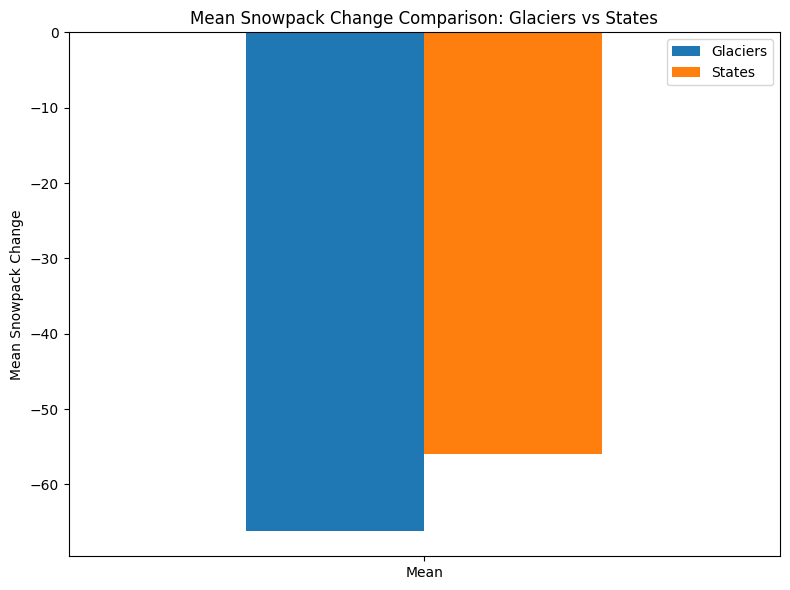

In [ ]:
# Compute means
mean3 = Glaciers_snowpack_change.mean().values[0]
mean4 = States_snowpack_change.mean().values[0]
print(mean4)
print(mean3)
# Create a DataFrame with an index
mean_snowpack_df = pd.DataFrame({'Glaciers': [mean3], 'States': [mean4]}, index=['Mean'])

# Plot
ax = mean_snowpack_df.plot(kind='bar', figsize=(8, 6))
ax.set_ylabel('Mean Snowpack Change')
ax.set_title('Mean Snowpack Change Comparison: Glaciers vs States')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()